In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('classic')
%matplotlib inline

In [4]:
gen = np.random.normal(loc=175, scale=5, size=8_000_000)

In [7]:
sample1 = np.random.choice(gen, size=10_000, replace=False)
sample2 = np.random.choice(gen, size=10_000, replace=False)


In [10]:
gen.mean()

175.00095990742003

In [8]:
sample1.mean()

175.0222754829431

In [9]:
sample2.mean()

175.01900208441637

In [ ]:
10_0000 
8_500

In [56]:
while True:
    a = np.random.normal(loc=100, scale=5, size=1000)
    b = np.random.normal(loc=100.5, scale=5, size=1000)

    _, pval = ttest_ind(a, b)
    if 0.05 > pval > 0.04:
        break

In [58]:
ttest_ind(a, b)

TtestResult(statistic=-2.04614707397515, pvalue=0.04087255229396245, df=1998.0)

In [59]:
z = norm.ppf(0.975)
l = z * 5 / 1000**0.5
print(f"ci a: {(a.mean() - l):.3f}; {(a.mean() + l):.3f}")
print(f"ci b: {(b.mean() - l):.3f}; {(b.mean() + l):.3f}")

ci a: 99.589; 100.209
ci b: 100.043; 100.662


In [63]:
0.95 * 0.95

0.9025

In [ ]:
(sigma^2 / n) **0.5

In [62]:
m = b.mean() - a.mean()
l = z * (5 ** 2 / 1000 + 5 ** 2 / 1000) **0.5
print(f"ci b-a: {(m - l):.3f}; {(m + l):.3f}")

ci b-a: 0.016; 0.892


## **Критерий Колмогорова**


__Гипотеза о неизвестном законе распределения:__ 

$$
\begin{aligned}
H_0 : X \sim F_0 \\
H_1 : X \nsim F_0
\end{aligned}
$$

__Статистика:__ 

$$
K_n = \sqrt{n} \cdot \sup_{x} \mid \hat F_n(x) - F(x) \mid 
$$

При справедливости нулевой гипотезы распределение статистики $K_n$ одинаково для любого исходного непрерывного распределения.



Попробуем провести тест Колмогорова на нескольких искуственных примерах. 

In [67]:
x = stats.norm(loc=5, scale=3).rvs(1000)

<Axes: ylabel='Count'>

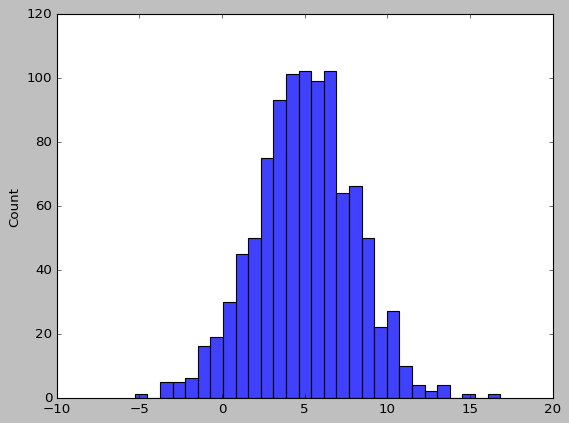

In [68]:
sns.histplot(x)

In [69]:
stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1)))

KstestResult(statistic=0.015388832720315548, pvalue=0.968963555121168, statistic_location=3.992510718160257, statistic_sign=-1)

In [73]:
?stats.kstest

In [72]:
x = stats.norm(loc=5, scale=3).rvs(1000)
stats.kstest(x, 'norm', args=(4.5, x.std(ddof=1)))

KstestResult(statistic=0.05281161197847484, pvalue=0.007281333397842217, statistic_location=5.376311679950723, statistic_sign=-1)

<Axes: ylabel='Count'>

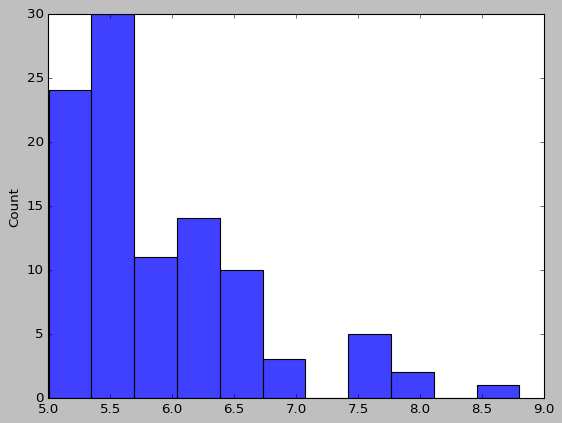

In [76]:
sns.histplot(x)

In [89]:
?stats.kstest

In [88]:
x = stats.expon(5).rvs(1000)
stats.kstest(x, stats.expon(4.99).cdf)

KstestResult(statistic=0.02041119335050734, pvalue=0.7910282241691694, statistic_location=6.2608650028810215, statistic_sign=-1)

Гипотеза о нормальности для выборки, сгенерированной из нормального распределения не отвергается. Сгенерируем выборку из равномерного распределения, а после протестируем гипотезу о нормальности.  

In [125]:
?stats.kstest

In [112]:
x = stats.poisson(mu=10).rvs(1000)
stats.kstest(x, stats.poisson(mu=10).cdf)

KstestResult(statistic=0.11603975019298512, pvalue=3.4587349392815194e-12, statistic_location=10, statistic_sign=-1)

In [124]:
x = stats.t(df=3).rvs(1000)
stats.kstest(x, stats.t(df=3).cdf)

KstestResult(statistic=0.026339133094747058, pvalue=0.48352265736847777, statistic_location=-0.3689318072214663, statistic_sign=-1)

In [3]:
x = stats.uniform(0,1).rvs(1000)
stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1)))

KstestResult(statistic=0.06508418682878359, pvalue=0.00039830034673745443, statistic_location=0.7055925753149824, statistic_sign=-1)

Видим, что $p\_value$ очень низкое. Гипотеза о нормальности отвергается. По аналогии можно протестировать гипотезу для любого распределения. Вот пример с экспоненциальным распределением: 

In [4]:
x = stats.expon(scale=0.2).rvs(1000)
stats.kstest(x, 'expon', args=(0, x.mean()))

KstestResult(statistic=0.021366432149259207, pvalue=0.7428338729373113, statistic_location=0.1233264817970729, statistic_sign=-1)

Первый аргумент отвечает за `loc` (экспоненциальное распределение со сдвигом). Он равен нулю.



## **Подгрузим данные о стоимости акций Яндекса в течение последних 10 лет.**

In [126]:
df = pd.read_csv('data/ynd.tsv', sep='\t')
df['fielddate'] = pd.to_datetime(df['fielddate'])
df.set_index('fielddate', inplace=True)
print(df.shape)
df.head()

(2291, 6)


,open,high,low,close,volume,adjusted
fielddate,,,,,,
2011-05-24,35.000000,42.009998,30.549999,38.840000,70186700.0,38.840000
2011-05-25,37.750000,37.900002,34.400002,35.000000,11761600.0,35.000000
2011-05-26,34.450001,35.450001,34.000000,34.770000,4417500.0,34.770000
2011-05-27,34.750000,35.000000,34.000000,34.450001,2006000.0,34.450001
2011-05-31,34.950001,35.369999,32.610001,33.450001,3981100.0,33.450001


Доходность:
$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

In [127]:
r = (df.close.diff()/df.close.shift(1)).dropna()
r

fielddate
2011-05-25   -0.098867
2011-05-26   -0.006571
2011-05-27   -0.009203
2011-05-31   -0.029028
2011-06-01   -0.035874
                ...   
2020-06-24    0.026531
2020-06-25    0.004970
2020-06-26   -0.030069
2020-06-29    0.004283
2020-06-30    0.015841
Name: close, Length: 2290, dtype: float64

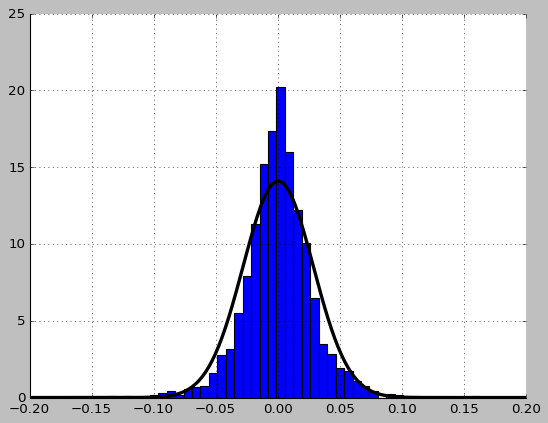

In [128]:
r.hist(bins=50, density=True);

xs = np.linspace(-0.2, 0.2, 300)
ys = stats.norm(loc=r.mean(), scale=r.std(ddof=1)).pdf(xs)
plt.plot(xs, ys, color="black", lw=3);
sns.despine();

 Как это не странно, оно оказывается куполообразным. Издали распределение напоминает собой нормальное. Однако это ещё не факт. Можно заметить, что у распределения довольно тяжёлые хвосты. Чтобы увидеть это построим диаграмму квантиль-квантиль. Она позволяет сравнить выборочное распределение с теоретическим. 

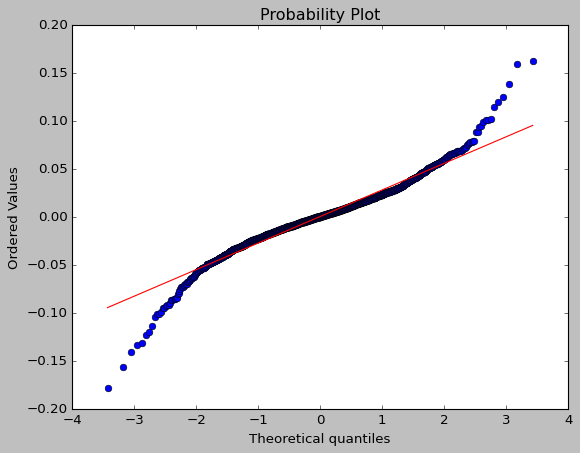

In [129]:
stats.probplot(r, dist="norm", plot=plt);

На диаграмме по оси $x$ откладываются значения из теоретического нормального распределения. По оси $y$ откладывают значения, которые фигурируют в выборке. Если бы наши наблюдения были из нормального распределения, они бы оказались на диагонали. Центр, действительно, укладывается на неё. А вот хвосты с неё спадают. Они оказываются тяжелыми.

Проверим гипотезу тестом Колмогорова. 

In [130]:
r.mean(), r.std(ddof=1)

(0.0005134013394187065, 0.02832192239992791)

In [131]:
stats.kstest(r, 'norm', args=(r.mean(), r.std(ddof=1)))

KstestResult(statistic=0.05845783509742092, pvalue=3.035955008496118e-07, statistic_location=-0.019044615018564158, statistic_sign=-1)

Гипотеза о нормальности отвергается, p_value оказалось очень маленьким. Обычно доходности моделируют с помощью распределений с тяжёлыми хвостами. Попробуем проверить ту же самую гипотезу, но с помощью критерия, специфицированного под хвосты [(Андерсона-Дарлинга)](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.normal_ad.html#statsmodels.stats.diagnostic.normal_ad): мы переносим на хвосты распределения дополнительный вес, чтобы критерий был к ним более чувствительным. 

In [132]:
from statsmodels.stats.diagnostic import normal_ad
pval = normal_ad(r)
pval # гипотеза о нормальности отвергается

(19.749165127467222, 0.0)

Попробуем этот же тест для выборки из нормального распределения.

In [133]:
x = stats.norm(loc=5, scale=3).rvs(1000)
normal_ad(x)  # гипотеза о нормальности не отвергается

(0.28087375359439193, 0.6409573363550037)



__Ещё одно полезное свойство критерия:__ можно проверять гипотезу об однородности выборок, то есть пытаться понять из одного ли распределения они к нам пришли. Колмогоров доказал, что для этого случая распределение Колмогорова тоже подходит.

In [134]:
x = stats.norm(loc=5, scale=3).rvs(1000)
y = stats.norm(loc=5, scale=3).rvs(1000)
z = stats.expon(scale=0.2).rvs(1000)

In [190]:
res.pvalue

0.4659595288557257

In [201]:
pvals = []
for _ in tqdm(range(2000)):
    res = stats.ks_2samp(
        stats.expon(scale=0.2).rvs(1000),
        stats.expon(scale=0.2).rvs(1000)
    )
    pvals.append(res.pvalue)
(np.array(pvals) < 0.05).mean()


100%|██████████████████████████████████████| 2000/2000 [00:03<00:00, 580.71it/s]


0.0575

In [237]:
x = stats.norm(loc=5, scale=3).rvs(10000)
y = stats.norm(loc=5, scale=10).rvs(10000)
stats.ks_2samp(x, y)

KstestResult(statistic=0.2617, pvalue=2.4547943389234047e-301, statistic_location=0.5433869243921254, statistic_sign=-1)

In [135]:
stats.ks_2samp(x, y)

KstestResult(statistic=0.024, pvalue=0.9357699014782725, statistic_location=0.09783306215044263, statistic_sign=-1)

In [202]:
stats.ks_2samp(x, z)

KstestResult(statistic=0.914, pvalue=0.0, statistic_location=0.9636765656306354, statistic_sign=-1)

> __Важно:__  Критерий работает только для непрерывных распределений! Для дискретных ситуаций обычно используют критерий Пирсона. 

## **Критерий Пирсона**


__Гипотеза о неизвестном законе распределения:__ 


$$
\begin{aligned}
H_0 : X \sim F_0 \\
H_1 : X \nsim F_0
\end{aligned}
$$

__Статистика:__ 

$$
\sum_{j=1}^s \frac{(v_j - n \cdot p_j(\hat \theta))^2}{n \cdot p_j(\hat \theta)} \sim \chi^2_{s - k - 1},
$$

где $\hat \theta$ - любая состоятельная оценка параметра, $v_j$ - частота, с которой значение $j$ встречалось в выборке, $p_j$ - теоретическая вероятность того, что выпадет значение $j$,  $s$ - число значений, которые может принимать случайная величина, $k$ - размерность вектора параметров $\theta$, 



**В десятичной записи числа $\pi$ среди первых $10002$ знаков после запятой цифры $0, 1, \dots, 9$ встречаются соответственно 968, 1026, 1021, 974, 1014, 1046, 1021, 970, 948, 1014 раз. Можно ли при уровне значимости $0.05$ считать эти цифры случайными? При каком уровне значимости эта гипотеза отвергается?**


У нас есть дискретное распределение и $10$ вероятностей. Нужно проверить гипотезу о равномерности этого распределения. Будем делать это с помощью критерия Пирсона. 

In [242]:
n = 10002
X = np.array([968, 1026, 1021, 974, 1014, 1046, 1021, 970, 948, 1014])
p = X/n
p

array([0.09678064, 0.10257948, 0.10207958, 0.09738052, 0.10137972,
       0.10457908, 0.10207958, 0.0969806 , 0.09478104, 0.10137972])

In [243]:
p0 = np.array([1/10]*10)
p0

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Статистика для теста Пирсона выглядит как

$$
\sum_{j=1}^{10} \frac{(v_j - n \cdot p_j(\hat \theta))^2}{n \cdot p_j(\hat \theta)} \sim \chi^2_{9},
$$

In [244]:
T = np.sum((X - n*p0)**2/(n*p0))
T

9.367726454709057

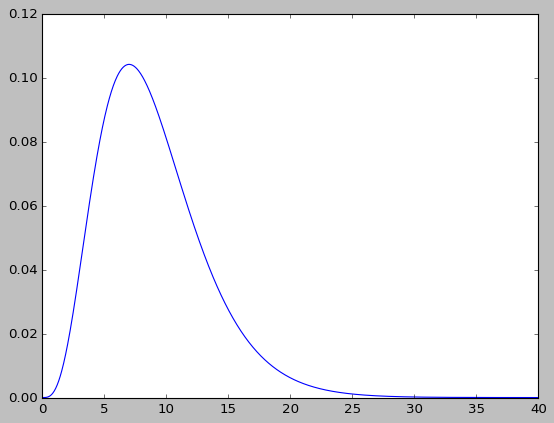

In [245]:
x_vals = np.linspace(0, 40, 1000)
plt.plot(x_vals, stats.chi2(df=9).pdf(x_vals))

Статистика Пирсона имеет $\chi^2_9$. Найдём для неё критическое значения на уровне значимости $5\%$.

In [246]:
stats.chi2.ppf(0.95, df = 9)

16.918977604620448

Наблюдаемое значение меньше критического. Гипотеза о равномерности не отвергается. Найдём $p\_value$.

In [20]:
1 - stats.chi2.cdf(T, df = 9)

0.4040452075150309

Видим, что $p\_value$ на порядок выше $5\%$, значит гипотеза не отвергается. 

Ровно то же самое можно сделать встроенным тестом. 

In [247]:
from scipy.stats import chisquare
chisquare(X, f_exp=n*p0)

Power_divergenceResult(statistic=9.367726454709057, pvalue=0.40404520751503087)

> По аналогии с тестом Колмогорова, тест Пирсона можно использовать, чтобы проверять выборки на однородность. В таком случае критерий хочет получить на вход таблицу сопряжённости для двух распределений. 


**Мужчин и женщин опрашивают о их политических взглядах. Правда ли, что их распределение значимо различается.**



In [250]:
df = pd.DataFrame([[762, 327, 468],[484, 239, 477]])
df.columns = ["Democrat","Independent", "Republican"]
df.index = ["F", "M"]
df

,Democrat,Independent,Republican
F,762,327,468
M,484,239,477


In [285]:
n1, n2 = 200, 200
val1 = stats.binom(p=0.5, n=n1).rvs(1)[0]
a = [val1, n1-val1]

val2 = stats.binom(p=0.3, n=n2).rvs(1)[0]
b = [val2, n2-val2]
print(a, b)
chi2_contingency([a, b])

[94, 106] [50, 150]


Chi2ContingencyResult(statistic=20.06293402777778, pvalue=7.493500886454294e-06, dof=1, expected_freq=array([[ 72., 128.],
       [ 72., 128.]]))

In [275]:
chi2_contingency([a, b])

Chi2ContingencyResult(statistic=26.09671442365406, pvalue=3.2473613063419805e-07, dof=1, expected_freq=array([[ 79.5, 120.5],
       [ 79.5, 120.5]]))

Chi2ContingencyResult(statistic=1.0472988069171991, pvalue=0.30613001707957144, dof=1, expected_freq=array([[ 46.33333333,  53.66666667],
       [ 92.66666667, 107.33333333]]))

In [258]:
df.values.sum(axis=1)

array([1557, 1200])

In [251]:
df.values

array([[762, 327, 468],
       [484, 239, 477]])

In [252]:
from scipy.stats import chi2_contingency
chi, pvalue, k, _ = chi2_contingency(df.values)

In [253]:
chi

30.070149095754672

In [254]:
pvalue

2.9535891832117595e-07

In [255]:
k

2

Гипотеза об однородности выборок отвергается. 

## **Непараметрические критерии**

In [287]:
df_2015 = pd.read_csv("data/2015.csv")
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [289]:
df_2015.shape

(158, 12)

In [30]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

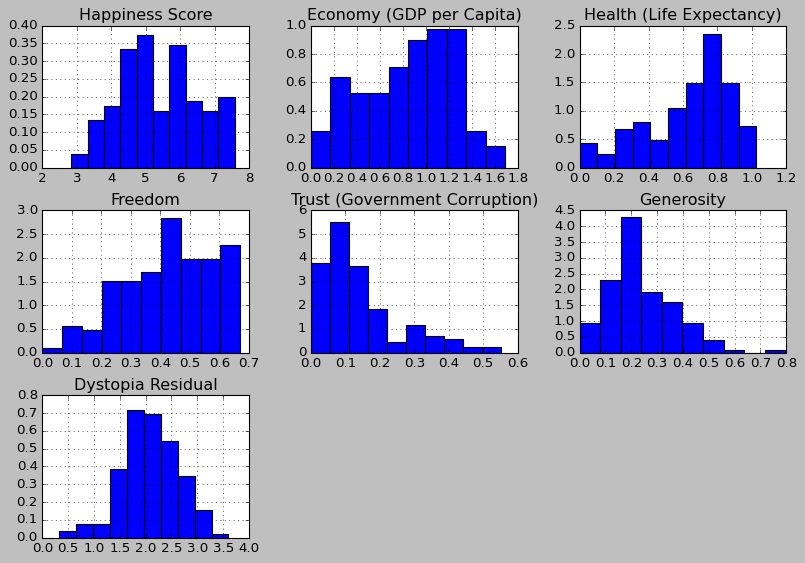

In [33]:
plot_cols = ['Happiness Score', 'Economy (GDP per Capita)',
         'Health (Life Expectancy)', 'Freedom',
         'Trust (Government Corruption)','Generosity', 
         'Dystopia Residual']

df_2015[plot_cols].hist(density=True, figsize=(12,8));


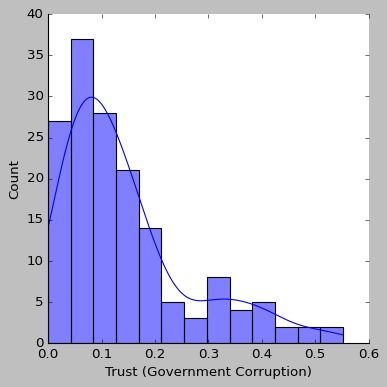

In [36]:
sns.displot(df_2015['Trust (Government Corruption)'], kde=True);

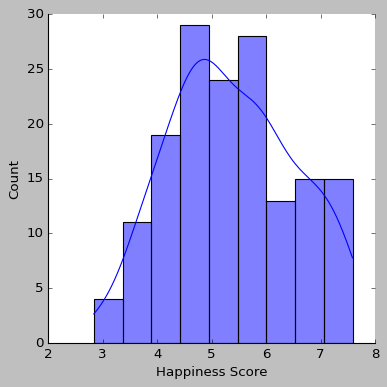

In [37]:
sns.displot(df_2015['Happiness Score'], kde=True);

### **Одновыборочные критерии**

Проверим гипотезу о том, что медиана уровнея счастья равна $5$. 

$H_0\colon Med(X) = 5$

$H_1\colon Med(X) \ne 5$

In [38]:
df_2015['Happiness Score'].describe()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

## **Критерий знаков**

Критерии такого типа почти ничего не требуют от имеющихся данных, что делает их универсальными, однако они имеют достаточно низкую мощность. Существует два основных критерия знаков:

- **Одновыборочный критерий знаков**
- **Двувыборочный критерий знаков**

Для примера рассмотрим первый критерий. С помощью одновыборочного критерия знаков мы можем проверить гипотезу о равенстве медианны исходного распределения некоторому значению, и единственное требование к нашей выборке будет отсутствие этого значения в ней. В качестве статистики будем использовать число объектов выборки, имеющих значение больше, чем выбранное для проверки, и в случае справедливости нулевой гипотезы, распределение такой статистики будет иметь вид биномиального с вероятностью успеха 1/2 и числом испытаний равному размеру выборки, так вероятность реализоваться правее или левее медианы будет равновероятна для любого объекта выборки.

![title](1.png)

## **Критерий рангов**

В отличии от критериев знаков, ранговые критерии учитывают информацию о взаимном положении значений метрики на объектах из выборок.\ Для использования ранговых критриев необходимо преобразовать выборку в вариационный ряд и присвоить каждому наблюдению ранг - его позицию в вариационном ряду. Для объектов имеющих одинаковое метрики значение ранг будет одинаковым и считается средним по связке. Существует три основных критерия рангов:

- **Критерий знаковых рангов Уилкоксона (одновыборочный)**
- **Критерий Уилкоксона для связных выборок (двувыборчный, связанные выборки)**
- **Критерий Уилкоксона-Манна-Уитни (двувыборочный, независимые выборки)**

Последний критерий является очень популярным в прикладной статистике, рассмотрим подробнее механизм его работы.\ Наш критерий проверяет гипотезу о равенстве функций распределения двух выборок против альтернативной гипотезы об их сдвиге. Если справедлива альтернативная гипотеза и между распределениями действительно есть сдвиг, то средние значения признаков в выборках будут различаться. Поэтому это тоже в каком-то виде гипотеза о средних. Стоит подчеркнуть, что одно из условий Уилкоксона-Манна-Уитни предполагает, что функции распределения для обеих выборок имеют одинаковую форму.

Тогда объединяя два вариационных ряда, полученных из имеющихся выборок, в один и расчитывая для него значения рангов, в качестве статитистики можно использовать сумму рангов для элементов, относящихся к первой выборке. В условиях справедливости нулевой гипотезы каждый отдельное значение ранга могло реализоваться с одинаковой вероятностью в обеих выборках. Таким образом, перебирая все возможные значения реализации комбнации рангов можно вычислить табличное распределение нулевое распределение для статистики.

![title](2.png)

__Воспользуемся критерием знаков и критерием Уилкоксона. Оба критерия отвергают гипотезу.__

In [300]:
from statsmodels.stats.descriptivestats import sign_test

x = df_2015['Happiness Score'].values
T, pvalue = sign_test(x, mu0=5.3)
T, pvalue

(-3.0, 0.6909249767024598)

In [308]:
stats.wilcoxon(x - 5.4)

WilcoxonResult(statistic=6087.0, pvalue=0.736934651534198)

In [301]:
_, pvalue = stats.wilcoxon(x - 5)
pvalue

0.0003762684243784701

## **Двухвыборочные (несвязанные выборки)**

Правда ли, что в Европе уровень счастья выше, чем в Азии? 


In [41]:
df_2015.Region.value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

In [309]:
usl = df_2015.Region.apply(lambda w: 'Asia' in w)
x_asia = df_2015[usl]['Happiness Score']
x_asia.size

22

In [310]:
x_asia

23     6.798
33     6.455
37     6.298
45     5.987
46     5.984
60     5.770
71     5.474
73     5.399
74     5.360
78     5.253
80     5.194
83     5.140
89     5.073
98     4.876
99     4.874
108    4.694
116    4.565
120    4.514
128    4.307
131    4.271
144    3.819
152    3.575
Name: Happiness Score, dtype: float64

In [312]:
usl = df_2015.Region.apply(lambda w: 'Europe' in w)
x_eur = df_2015[usl]['Happiness Score']
x_eur.size

50

In [313]:
x_eur

0      7.587
1      7.561
2      7.527
3      7.522
5      7.406
6      7.378
7      7.364
12     7.200
16     6.946
17     6.940
18     6.937
20     6.867
25     6.750
28     6.575
30     6.505
35     6.329
36     6.302
43     6.003
44     5.995
49     5.948
51     5.889
53     5.855
54     5.848
55     5.833
58     5.813
59     5.791
61     5.759
63     5.716
65     5.695
66     5.689
68     5.589
69     5.548
72     5.429
76     5.286
79     5.212
82     5.192
85     5.124
86     5.123
87     5.102
88     5.098
92     5.007
94     4.959
95     4.949
101    4.857
103    4.800
105    4.786
110    4.681
126    4.350
129    4.297
133    4.218
Name: Happiness Score, dtype: float64

__Ранговый критерий Манна-Уитни__

$H_0\colon f_{X}(x) = f_{Y}(x)$

$H_1\colon f_{X}(x) = f_{Y}(x + \Delta), \Delta > 0$

In [336]:
np.percentile(x_eur, q=50) - np.percentile(x_asia, q=50)


0.6349999999999998

In [379]:
stats.mannwhitneyu(x_eur-0.67, x_asia, alternative='two-sided')

MannwhitneyuResult(statistic=552.0, pvalue=0.9853701513356573)

In [381]:
x_eur.mean() - x_asia.mean()

0.7354672727272717

In [374]:
d = {}
for shift in np.linspace(0, 1, 101):
    d[shift] = stats.mannwhitneyu(x_eur-shift, x_asia, alternative='two-sided').pvalue

In [377]:
np.argmax(list(d.values()))

67

In [378]:
list(d.keys())[67]

0.67

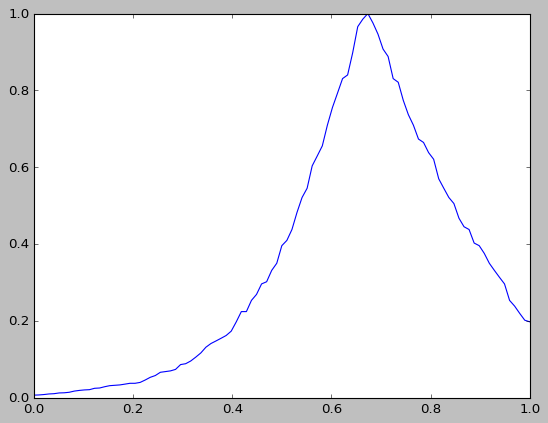

In [371]:
plt.plot(list(d.keys()), list(d.values()))

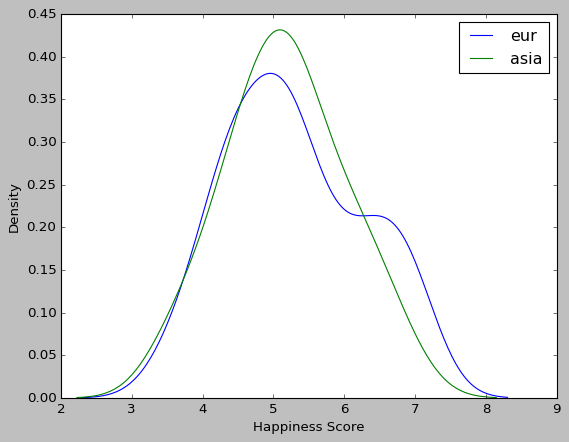

In [337]:
sns.kdeplot(x_eur-0.6, label='eur')
sns.kdeplot(x_asia, label='asia')
plt.legend()

Гипотеза отвергается. По этим данным, в Европе люди счастливее.

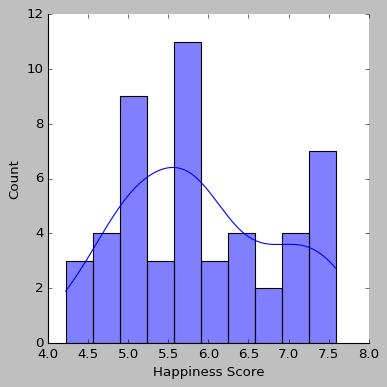

In [45]:
sns.displot(x_eur, bins=10, kde=True);

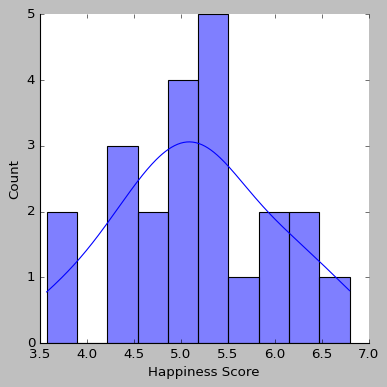

In [49]:
sns.displot(x_asia, bins=10, kde=True);

Плотности визуально различаются. Возможно, что мы использовали тест некорректно. Не помешает дополнительно проверить гипотезу о том, что обе выборки относятся к одному распределению: 

In [333]:
stats.ks_2samp(x_eur-0.5, x_asia)

KstestResult(statistic=0.16363636363636364, pvalue=0.7382170959036201, statistic_location=5.987, statistic_sign=-1)

Гипотеза об одинаковом распределении отвергается. Другой путь: ориентироваться на здравый смысл, а он нам подсказывает, что, скорее всего, счастье не могло поменять свой закон распределения за пять лет. Хотя никто не гарантирует, что за этот период времени в формировании счастья не было никаких структурных сдвигов.

## **Двухвыборочные (связные выборки)**

Правда ли, что к 2019 году уровень счастья в мире вырос?

In [382]:
df_2015 = pd.read_csv("data/2015.csv")
df_2015 = df_2015[['Country','Happiness Score']]
df_2015.columns = ['Country', 'Happiness_2015']
df_2015.set_index('Country', inplace=True)

df_2019 = pd.read_csv("data/2019.csv")
df_2019 = df_2019[['Country or region','Score']]
df_2019.columns = ['Country', 'Happiness_2019']
df_2019.set_index('Country', inplace=True)

df = df_2019.join(df_2015).dropna()
df.head()

,Happiness_2019,Happiness_2015
Country,,
Finland,7.769,7.406
Denmark,7.600,7.527
Norway,7.554,7.522
Iceland,7.494,7.561
Netherlands,7.488,7.378


In [53]:
df.describe()

,Happiness_2019,Happiness_2015
count,149.000000,149.000000
mean,5.433872,5.378289
std,1.111243,1.157782
min,3.083000,2.839000
25%,4.548000,4.518000
50%,5.425000,5.253000
75%,6.198000,6.295000
max,7.769000,7.587000


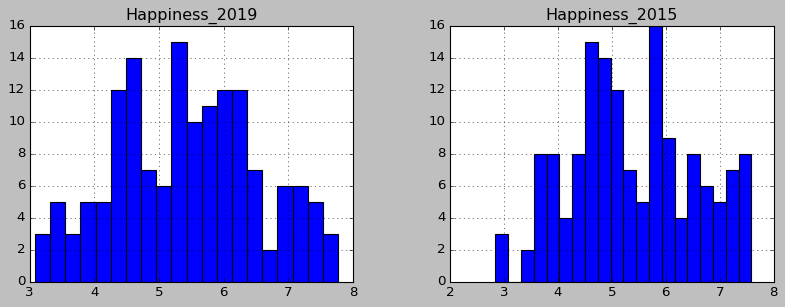

In [56]:
df.hist(figsize=(12,4), bins=20);

<Axes: ylabel='Count'>

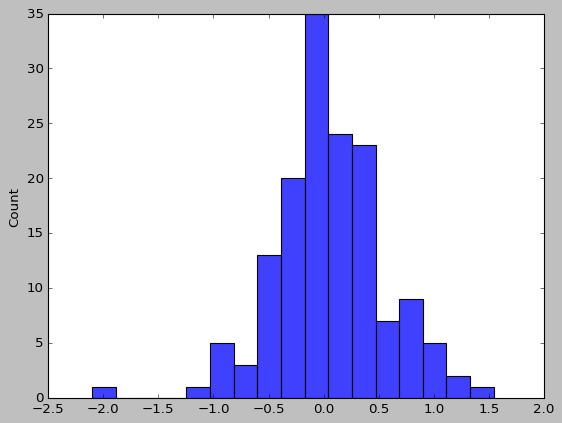

In [385]:
sns.histplot(df.Happiness_2019 - df.Happiness_2015)

__Критерий знаков__

$H_0\colon P(X > Y) = 0.5$

$H_1\colon P(X > Y) \ne 0.5$

In [57]:
_, pvalue = sign_test(df.Happiness_2019 - df.Happiness_2015)
print(pvalue)

0.7432690217670562


Гипотеза об о том, что уровень счастья не изменился, не отвергается. 

__Ранговый тест Уилкоксона__

$H_0\colon Med(X - Y) = 0$

$H_1\colon Med(X - Y) \ne 0$

In [386]:
stats.wilcoxon(df.Happiness_2019, df.Happiness_2015)

WilcoxonResult(statistic=4948.0, pvalue=0.22554445938820344)

100%|█████████████████████████████████████| 2000/2000 [00:01<00:00, 1045.81it/s]


0.2305


<Axes: ylabel='Count'>

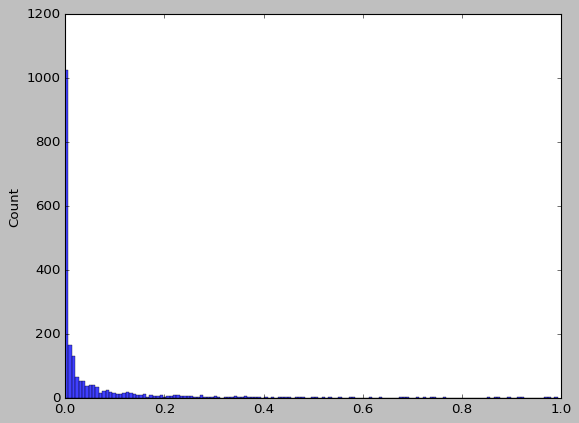

In [417]:
pvals = []
for _ in tqdm(range(2000)):
    a = np.random.normal(loc=100, scale=5, size=100)
    b = np.random.normal(loc=102, scale=5, size=100)
    pvals.append(stats.mannwhitneyu(a, b).pvalue)
#     pvals.append(stats.ttest_ind(a, b).pvalue)

print((np.array(pvals) > 0.05).mean())

sns.histplot(pvals)